In [1]:
import pandas as pd
import numpy as np

true_news = pd.read_csv(r'data\df_real_data.csv')
false_news = pd.read_csv(r'data\df_rumor_data.csv')
true_news.shape, false_news.shape

((10000, 8), (22479, 8))

In [2]:
true_false_news = true_news.append(false_news)
true_false_news = true_false_news.drop(['Unnamed: 0'], axis=1)
true_false_news = true_false_news.reset_index(drop=True)
true_false_news.head()

,authorDic,edges,keyUser,layerNum,rpsttimeline,status,weiboID
0,"{'province': '11', 'weiboText': '远去的大师', 'scre...",{},{'4010120209906916': 'http://tva3.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2014-12-31 22:50:00', 0], ['2014-12-31 23:0...",1,3793976291216967
1,"{'province': '11', 'weiboText': '中国青年女科学家奖十周年纪...",{'3658686746755393': {'posttime': 'Mon Dec 23 ...,{'4010120209906916': 'http://tva3.sinaimg.cn/c...,"[2, 0, 0, 0, 0, 0]","[['2013-12-18 11:00:00', 1], ['2013-12-18 11:1...",1,3656813583185243
2,"{'province': '11', 'weiboText': '【民办教师首次纳入职评体系...",{},{'4006787155492653': 'http://tva3.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2016-04-19 09:00:00', 0], ['2016-04-19 09:1...",1,3965901743766209
3,"{'province': '22', 'weiboText': '转发微博', 'scree...",{},{'4010300573400632': 'http://tva1.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2016-02-23 09:10:00', 0], ['2016-02-23 09:2...",1,3945608626241268
4,"{'province': '64', 'weiboText': '转发微博', 'scree...",{},{'4010300573400632': 'http://tva1.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2016-08-19 09:50:00', 0], ['2016-08-19 10:0...",1,4010124030948666


In [7]:
true_false_emo = pd.read_csv('data/true_false_emo.csv')
true_false_emo = true_false_emo.reset_index(drop=True)
true_false_news['emo_prob'] = true_false_emo['emo_prob']
true_false_news = true_false_news[true_false_news['emo_prob']!='-1']
true_false_news.shape

(30901, 8)

In [8]:
true_false_news = true_false_news.reset_index(drop=True)

In [9]:
classify_data = pd.read_csv('data/classify_data_3_emo_cla_prob_extra_topic_extendEmoDict_2_updateSTSC.csv')
classify_data.shape

(30901, 41)

In [10]:
classify_data[['authorDic', 'edges', 'keyUser', 'layerNum', 'rpsttimeline', 'status', 'weiboID']] = true_false_news[['authorDic', 'edges', 'keyUser', 'layerNum', 'rpsttimeline', 'status', 'weiboID']]
classify_data.shape

(30901, 47)

In [11]:
classify_data = classify_data[classify_data['repostNum']!=0]
classify_data.shape

(15564, 47)

In [12]:
import ast
def timeline(tl):
    repost_timeline = []
    tl = ast.literal_eval(tl)
    for l in tl:
        repost_timeline.append(l[1])
    return repost_timeline
classify_data['repost_timeline'] = classify_data['rpsttimeline'].apply(timeline)

In [13]:
classify_data['repost_timeline_per'] = classify_data['repost_timeline'].apply(lambda l: np.array(l)/sum(l) )

In [14]:
classify_data['time_len'] = classify_data['repost_timeline'].apply(lambda l: len(l))
classify_data['repost_timeline_per'] = classify_data['repost_timeline_per'].apply(lambda l: list(l))

In [15]:
from collections import Counter
Counter(classify_data['label'])

Counter({'LT': 3039, 'HT': 1703, 'LF': 4839, 'HF': 5983})

## 真假信息的repost timeline对比

In [17]:
def repost_l(news_type):
    repost_per = list(classify_data['repost_timeline_per'][classify_data['label']==news_type].get_values())
    timeline = []
    for tl in repost_per:
        for i in range(len(tl)):
            if len(timeline) < i+1:
                timeline.append(tl[i])
            else:
                timeline[i] += tl[i]
    return timeline
HT_timeline = repost_l('HT')
LT_timeline = repost_l('LT')
HF_timeline = repost_l('HF')
LF_timeline = repost_l('LF')

In [18]:
# Counter({'LT': 3039, 'HT': 1703, 'LF': 4839, 'HF': 5983})
HT_timeline = [num/1703 for num in HT_timeline]
LT_timeline = [num/3039 for num in LT_timeline]
HF_timeline = [num/5983 for num in HF_timeline]
LF_timeline = [num/4839 for num in LF_timeline]

In [19]:
def agg(timeline):
    hourline = []
    for i in range(0,48):
        hourline.append(sum(timeline[i*6:(i+1)*6]))
    return hourline

HT_hourline = agg(HT_timeline)
LT_hourline = agg(LT_timeline)
HF_hourline = agg(HF_timeline)
LF_hourline = agg(LF_timeline)

In [20]:
len(HT_hourline)

48

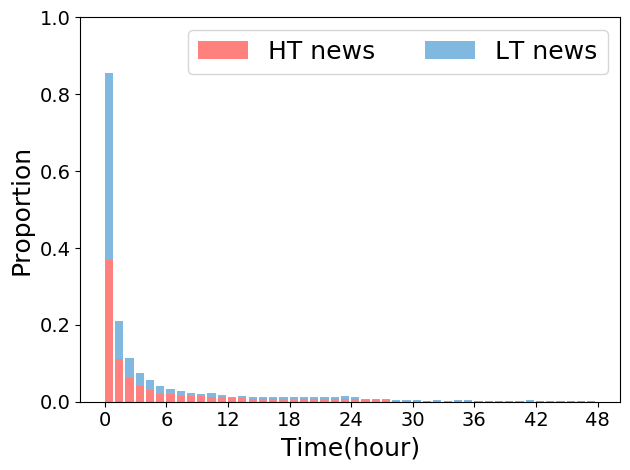

In [37]:
import matplotlib.pyplot as plt

font1 = {
    'weight' : 'light',
    'size'   : 18,
}
font2 = {
    'weight' : 'light',
    'size'   : 14,
}
# plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(np.arange(48), HT_hourline, align="edge", color="#FE817D", label="HT news")
ax.bar(np.arange(48), LT_hourline, align="edge", bottom=HT_hourline, color="#81B8DF", label="LT news")
ax.set_xlabel('Time(hour)', font1, color='black')
ax.set_xticks([0, 6, 12, 18, 24, 30, 36, 42, 48])
ax.set_ylabel('Proportion', font1, color='black')
ax.legend(prop = font1, ncol=2)
ax.tick_params(labelsize=14, colors='black')
ax.set_ylim(0,1)
plt.tight_layout()
plt.savefig('images/T_hourline.pdf')
plt.savefig('images/T_hourline.jpg', dpi=600)
plt.show()

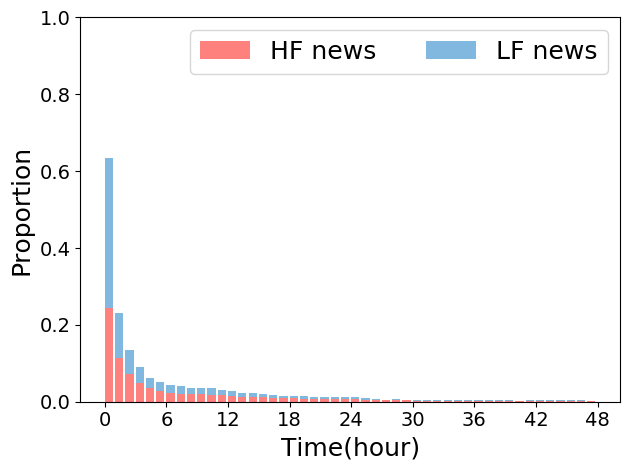

In [38]:
# plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(np.arange(48), HF_hourline, align="edge", color="#FE817D", label="HF news")
ax.bar(np.arange(48), LF_hourline, align="edge", bottom=HF_hourline, color="#81B8DF", label="LF news")
ax.set_xlabel('Time(hour)', font1, color='black')
ax.set_xticks([0, 6, 12, 18, 24, 30, 36, 42, 48])
ax.set_ylabel('Proportion', font1, color='black')
ax.legend(prop = font1, ncol=2)
ax.tick_params(labelsize=14, colors='black')
ax.set_ylim(0,1)
plt.tight_layout()
plt.savefig('images/F_hourline.pdf')
plt.savefig('images/F_hourline.jpg', dpi=600)
plt.show()

In [24]:
def repost_l_2(news_type):
    repost_per = list(classify_data['repost_timeline'][classify_data['label']==news_type].get_values())
    timeline = []
    for tl in repost_per:
        for i in range(len(tl)):
            if len(timeline) < i+1:
                timeline.append(tl[i])
            else:
                timeline[i] += tl[i]
    return timeline
# HT_repost = [num/1703 for num in repost_l_2('HT')]
# LT_repost = [num/3039 for num in repost_l_2('LT')]
# HF_repost = [num/5983 for num in repost_l_2('HF')]
# LF_repost = [num/4839 for num in repost_l_2('LF')]
HT_repost = repost_l_2('HT')
LT_repost = repost_l_2('LT')
HF_repost = repost_l_2('HF')
LF_repost = repost_l_2('LF')


In [25]:
def cdf_list(timeline):
    c_list = []
    for i in range(len(timeline)):
        length = int(timeline[i])
        c_list += ([i+1]*length)
    return c_list
HT_cdf = cdf_list(HT_repost)
LT_cdf = cdf_list(LT_repost)
HF_cdf = cdf_list(HF_repost)
LF_cdf = cdf_list(LF_repost)

In [26]:
classify_data['repost_48h'] = classify_data['repost_timeline'].apply(lambda l: sum(l[:288]))
repost_LT = classify_data['repost_48h'][classify_data['label'] == 'LT']
repost_HT = classify_data['repost_48h'][classify_data['label'] == 'HT']
repost_LF = classify_data['repost_48h'][classify_data['label'] == 'LF']
repost_HF = classify_data['repost_48h'][classify_data['label'] == 'HF']
repost_T = repost_LT.append(repost_HT)
repost_F = repost_LF.append(repost_HF)
repost_T = list(repost_T.get_values())
repost_F = list(repost_F.get_values())

In [28]:
import statsmodels.api as sm
def ecdf(data):
    return sm.distributions.ECDF(data)

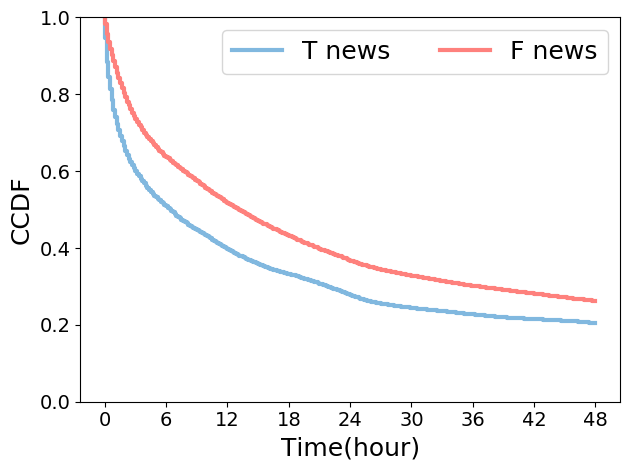

In [36]:
plt.style.use('default')
fig,ax = plt.subplots()

ax.step(np.arange(0, 289), 1-ecdf(LT_cdf+HT_cdf)(np.arange(0, 289)), label='T news', color='#81B8DF', linewidth=3)
ax.step(np.arange(0, 289), 1-ecdf(LF_cdf+HF_cdf)(np.arange(0, 289)), label='F news', color='#FE817D', linewidth=3)
ax.set_ylim(0, 1)
ax.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
ax.set_xticklabels([0, 6, 12, 18, 24, 30, 36, 42, 48])
ax.tick_params(labelsize=14, colors='black')
ax.set_xlabel('Time(hour)',font1, color='black')
ax.set_ylabel('CCDF', font1, color='black')
ax.legend(prop=font1, ncol=2)
plt.tight_layout()
plt.savefig('images/TFccdf.pdf')
plt.savefig('images/TFccdf.jpg', dpi=600)
plt.show()

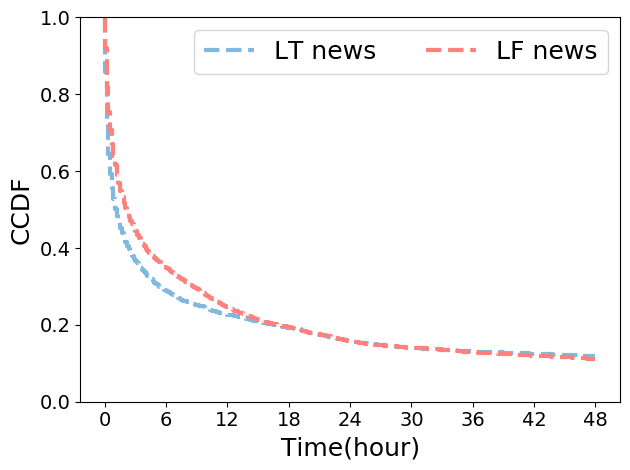

In [39]:
# plt.style.use('ggplot')
fig,ax = plt.subplots()

ax.step(np.arange(0, 289), 1-ecdf(LT_cdf)(np.arange(0, 289)), label='LT news', color='#81B8DF', linewidth=3, linestyle="--")
ax.step(np.arange(0, 289), 1-ecdf(LF_cdf)(np.arange(0, 289)), label='LF news', color='#FE817D', linewidth=3, linestyle="--")
ax.set_ylim(0, 1)
ax.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
ax.set_xticklabels([0, 6, 12, 18, 24, 30, 36, 42, 48])
ax.tick_params(labelsize=14, colors='black')
ax.set_xlabel('Time(hour)',font1, color='black')
ax.set_ylabel('CCDF', font1, color='black')
ax.legend(prop=font1, ncol=2)
plt.tight_layout()
plt.savefig('images/LTFccdf.pdf')
plt.savefig('images/LTFccdf.jpg', dpi=600)
plt.show()

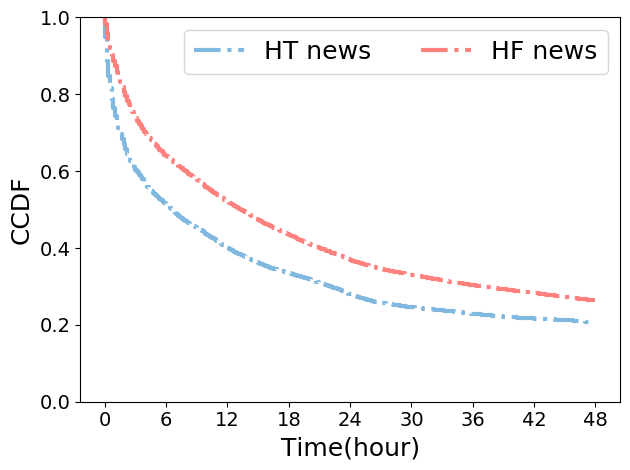

In [40]:
fig,ax = plt.subplots()

ax.step(np.arange(0, 289), 1-ecdf(HT_cdf)(np.arange(0, 289)), label='HT news', color='#81B8DF', linewidth=3, linestyle="-.")
ax.step(np.arange(0, 289), 1-ecdf(HF_cdf)(np.arange(0, 289)), label='HF news', color='#FE817D', linewidth=3, linestyle="-.")
ax.set_ylim(0, 1)
ax.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
ax.set_xticklabels([0, 6, 12, 18, 24, 30, 36, 42, 48])
ax.tick_params(labelsize=14, colors='black')
ax.set_xlabel('Time(hour)',font1, color='black')
ax.set_ylabel('CCDF', font1, color='black')
ax.legend(prop=font1, ncol=2)
plt.tight_layout()
plt.savefig('images/HTFccdf.pdf')
plt.savefig('images/HTFccdf.jpg', dpi=600)
plt.show()

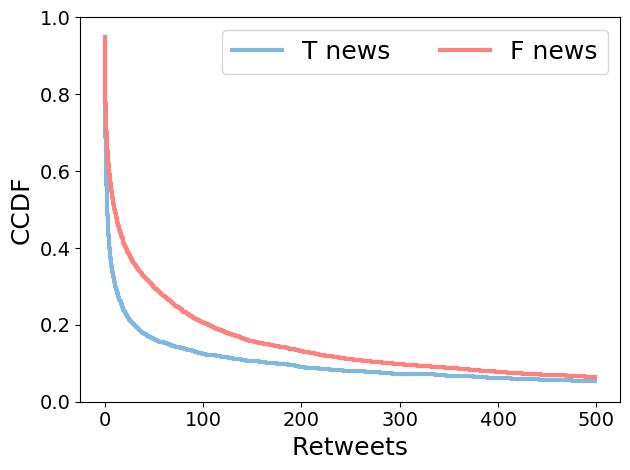

In [42]:
fig,ax = plt.subplots()

ax.step(np.arange(0, 500), 1-ecdf(repost_T)(np.arange(0, 500)), label='T news', color='#81B8DF', linewidth=3)
ax.step(np.arange(0, 500), 1-ecdf(repost_F)(np.arange(0, 500)), label='F news', color='#FE817D', linewidth=3)
ax.set_ylim(0, 1)
ax.tick_params(labelsize=14, colors='black')
ax.set_xlabel('Retweets',font1, color='black')
ax.set_ylabel('CCDF', font1, color='black')
ax.legend(prop=font1, ncol=2)
plt.tight_layout()
plt.savefig('images/RTFccdf.pdf')
plt.savefig('images/RTFccdf.jpg', dpi=600)
plt.show()

In [43]:
print(1-ecdf(LT_cdf)(288))
print(1-ecdf(LF_cdf)(288))
print(1-ecdf(HT_cdf)(288))
print(1-ecdf(HF_cdf)(288))
print(1-ecdf(LT_cdf+HT_cdf)(288))
print(1-ecdf(LF_cdf+HF_cdf)(288))
print(1-ecdf(repost_T)(500))
print(1-ecdf(repost_F)(500))

0.11917347429120617
0.11182326469384973
0.20650963597430405
0.26413160197938335
0.205016848083877
0.2627662091017061
0.05377477857444113
0.0647754574015893


In [44]:
from scipy.stats import kstest, ks_2samp

print(ks_2samp(LT_cdf+HT_cdf, LF_cdf+HF_cdf))
print(ks_2samp(LT_cdf, LF_cdf))
print(ks_2samp(HT_cdf, HF_cdf))
print(ks_2samp(repost_T, repost_F))

Ks_2sampResult(statistic=0.1395143997949059, pvalue=0.0)
Ks_2sampResult(statistic=0.11449607414115348, pvalue=6.863663056411228e-61)
Ks_2sampResult(statistic=0.13802580676918533, pvalue=0.0)
Ks_2sampResult(statistic=0.1948962315778791, pvalue=3.281119433697907e-109)
